Lightneer Data Engineer Test Question 2 Part B
by Zac Taylor

Imports:

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Collecting dataset from Eurostat via API using Pandas DataReader. Lexsort depth warning silenced due to irrelevance in this particular exercise. 


In [2]:
df = data.DataReader("demo_gind", 'eurostat')

A simple selection of male/female population growth in 3 similarly sized european countries.

In [3]:
fi_f = df['Average population - females', 'Finland']
fi_m = df['Average population - males', 'Finland']
nor_f = df['Average population - females', 'Norway']
nor_m = df['Average population - males', 'Norway']
den_f = df['Average population - females', 'Denmark']
den_m = df['Average population - males', 'Denmark']

In [4]:
tickers = ['FI F', 'FI M', 'NOR F', 'NOR M', 'DEN M', 'DEN F']
compare = pd.concat([fi_f, fi_m, nor_f, nor_m, den_m, den_f],axis=1,keys=tickers)

Text(0,0.5,'Population')

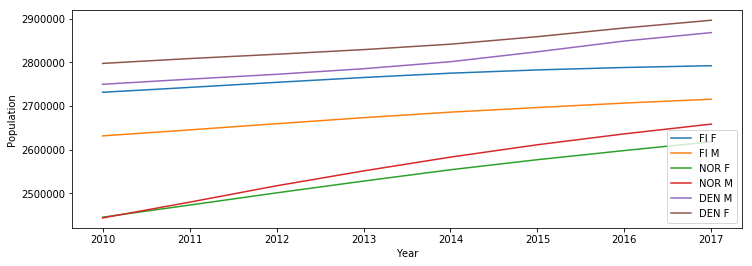

In [5]:
for tick in tickers:
    compare[tick]['Annual'].plot(figsize=(12,4),label=tick)
plt.legend()
plt.xlabel('Year')
plt.ylabel('Population')

Many many more visualization options are available but this was kept simple to show familiarity with API requests of a single database

Next, Finland's production of Electricity availability versus its population growth per year to highlight familiarity with combining multiple databases. Again all visualization can be vastly improved but kept simple as a demo.

In [6]:
df2 = data.DataReader("nrg_cb_e", 'eurostat')
fin_elec = df2['Gigawatt-hour', 'Electricity', 'Available for final consumption', 'Finland']
fin_pop = df['Average population - total', 'Finland']

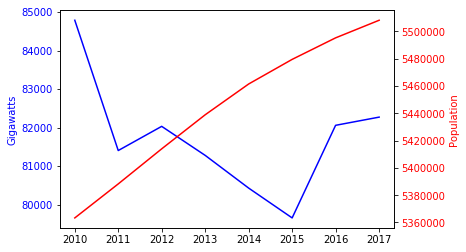

In [7]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(fin_elec, color='b')
ax1.set_ylabel('Gigawatts', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')
ax2 = ax1.twinx()
ax2.plot(fin_pop, color='r')
ax2.set_ylabel('Population', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')